In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
from os import listdir
%matplotlib inline
%run '/home/ihs3/Documents/Notebooks/rct008_import_getters.ipynb'

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# RCT008

In [3]:
# These are the all the events for rct008
dataBase = 'rct008'
eventsDf = getEvents(dataBase, path='/home/ihs3/Documents/Notebooks/Data/')
eventsDf

/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:81: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:83: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:85: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,,,Start_Time,Stop_Time,Power,Gas,Pressure
eventId,dataBase,run,,,,,
0,rct008,002,2016-09-02 20:53:22.656483,2016-09-02 21:23:25.001846,0W,Helium,1
1,rct008,002,2016-09-02 23:23:34.822606,2016-09-02 23:53:37.056826,50W,Helium,1
2,rct008,002,2016-09-03 01:23:44.482824,2016-09-03 01:53:46.589858,100W,Helium,1
3,rct008,002,2016-09-03 03:23:53.809033,2016-09-03 03:53:56.234947,150W,Helium,1
4,rct008,002,2016-09-03 05:14:03.260932,2016-09-03 05:44:05.493683,200W,Helium,1
5,rct008,002,2016-09-03 07:04:12.197388,2016-09-03 07:34:14.433757,250W,Helium,1
6,rct008,002,2016-09-03 10:54:30.246108,2016-09-03 11:24:32.501776,0W,Helium,1
7,rct008,002,2016-09-03 14:55:24.894030,2016-09-03 15:25:27.313742,0W,Helium,10
8,rct008,002,2016-09-03 17:25:37.353149,2016-09-03 17:55:39.565753,50W,Helium,10


In [4]:
# functions to get necessary data, taking averages
def findInputPower(eventTuple):
    CurrentSensor = 'v1'
    lineVoltageSensor = 'v4'
    
    datetime, lineVoltage = getEngData(lineVoltageSensor, eventTuple)
    datetime, fanCurrent = getEngData(CurrentSensor, eventTuple)
    
    PowerIn = np.mean(lineVoltage*fanCurrent)
    
    return PowerIn

def Temperatures(eventTuple):
    AmbientRTDs = ['amb_rtd1','amb_rtd2']
    ColdRTDs = ['rct_rtd1','rct_rtd2','rct_rtd9','rct_rtd10']
    WarmRTDs = ['rct_rtd3','rct_rtd4','rct_rtd7','rct_rtd8']
    HotRTDs = ['rct_rtd5','rct_rtd6']
    
    [date, Amb1] = getEngData(AmbientRTDs[0],eventTuple)
    [date, Amb2] = getEngData(AmbientRTDs[1],eventTuple)
    
    [date, Cold1] = getEngData(ColdRTDs[0],eventTuple) #rtd1
    [date, Cold2] = getEngData(ColdRTDs[1],eventTuple) #rtd2
    [date, Cold3] = getEngData(ColdRTDs[2],eventTuple) #rtd9
    [date, Cold4] = getEngData(ColdRTDs[3],eventTuple) #rtd10
    
    [date, Warm1] = getEngData(WarmRTDs[0],eventTuple) #rtd3
    [date, Warm2] = getEngData(WarmRTDs[1],eventTuple) #rtd4
    [date, Warm3] = getEngData(WarmRTDs[2],eventTuple) #rtd7
    [date, Warm4] = getEngData(WarmRTDs[3],eventTuple) #rtd8
    
    [date, Hot1] = getEngData(HotRTDs[0],eventTuple) #rtd5
    [date, Hot2] = getEngData(HotRTDs[1],eventTuple) #rtd6
    
    Ambient = (Amb1+Amb2)*0.5
    Cold = (Cold1+Cold2+Cold3+Cold4)*0.25 - Ambient
    Warm = (Warm1+Warm2+Warm3+Warm4)*0.25 - Ambient
    ColdWarm = (Cold1+Cold2+Cold3+Cold4+Warm1+Warm2+Warm3+Warm4)*0.125 - Ambient
    Hot = (Hot1+Hot2)*0.5 - Ambient
    All = (Cold1+Cold2+Cold3+Cold4+Warm1+Warm2+Warm3+Warm4+Hot1+Hot2)*0.1-Ambient

    amb1 = Amb1-Ambient
    amb2 = Amb2-Ambient
    rtd1 = Cold1-Ambient
    rtd2 = Cold2-Ambient
    rtd3 = Warm1-Ambient
    rtd4 = Warm2-Ambient
    rtd5 = Hot1-Ambient
    rtd6 = Hot2-Ambient
    rtd7 = Warm3-Ambient
    rtd8 = Warm4-Ambient
    rtd9 = Cold3-Ambient
    rtd10 = Cold4-Ambient
    
    
    return Ambient,Cold,Warm,ColdWarm,Hot,All,amb1,amb2,rtd1,rtd2,rtd3,rtd4,rtd5,rtd6,rtd7,rtd8,rtd9,rtd10

#FOR RUN 003, SINCE COPY DID NOT EXIST UNTIL: [28:42]
def Temperatures2(eventTuple): 
    AmbientRTDs = ['amb_rtd1','amb_rtd2']
    ColdRTDs = ['rct_rtd1','rct_rtd2','rct_rtd9','rct_rtd10']
    WarmRTDs = ['rct_rtd3','rct_rtd4','rct_rtd7','rct_rtd8']
    HotRTDs = ['rct_rtd5','rct_rtd6']
    
    copyRTDs = ['rct_rtd1Copy','rct_rtd2Copy','rct_rtd3Copy','rct_rtd4Copy','rct_rtd5Copy','rct_rtd6Copy',
               'rct_rtd7Copy','rct_rtd8Copy','rct_rtd9Copy','rct_rtd10Copy']
    
    [date, Amb1] = getEngData(AmbientRTDs[0],eventTuple)
    [date, Amb2] = getEngData(AmbientRTDs[1],eventTuple)
    
    [date, Cold1] = getEngData(ColdRTDs[0],eventTuple) #rtd1
    [date, Cold2] = getEngData(ColdRTDs[1],eventTuple) #rtd2
    [date, Cold3] = getEngData(ColdRTDs[2],eventTuple) #rtd9
    [date, Cold4] = getEngData(ColdRTDs[3],eventTuple) #rtd10
    
    [date, Warm1] = getEngData(WarmRTDs[0],eventTuple) #rtd3
    [date, Warm2] = getEngData(WarmRTDs[1],eventTuple) #rtd4
    [date, Warm3] = getEngData(WarmRTDs[2],eventTuple) #rtd7
    [date, Warm4] = getEngData(WarmRTDs[3],eventTuple) #rtd8
    
    [date, Hot1] = getEngData(HotRTDs[0],eventTuple) #rtd5
    [date, Hot2] = getEngData(HotRTDs[1],eventTuple) #rtd6
    
    [date, Cold1Copy] = getEngData(copyRTDs[0],eventTuple) #rtd1copy
    [date, Cold2Copy] = getEngData(copyRTDs[1],eventTuple) #rtd2copy
    
    [date, Warm1Copy] = getEngData(copyRTDs[2],eventTuple) #rtd3copy
    [date, Warm2Copy] = getEngData(copyRTDs[3],eventTuple) #rtd4copy
    
    [date, Hot1Copy] = getEngData(copyRTDs[4],eventTuple) #rtd5copy
        
    Ambient = (Amb1+Amb2)*0.5
    Cold = (Cold1+Cold2+Cold3+Cold4)*0.25 - Ambient
    Warm = (Warm1+Warm2+Warm3+Warm4)*0.25 - Ambient
    ColdWarm = (Cold1+Cold2+Cold3+Cold4+Warm1+Warm2+Warm3+Warm4)*0.125 - Ambient
    Hot = (Hot1+Hot2)*0.5 - Ambient
    All = (Cold1+Cold2+Cold3+Cold4+Warm1+Warm2+Warm3+Warm4+Hot1+Hot2)*0.1-Ambient
    
    ColdCopy = np.mean(Cold1Copy+Cold2Copy+Cold3+Cold4)*0.25-Ambient
    WarmCopy = np.mean(Warm1Copy+Warm2Copy+Warm3+Warm4)*0.25-Ambient
    HotCopy = np.mean(Hot1Copy+Hot1)*0.5-Ambient
    All2 = np.mean(Hot1+Warm3+Warm4+Cold3+Cold4+Cold1Copy+Cold2Copy+Warm1Copy+Warm2Copy+Hot1Copy)*0.1-Ambient
    
    amb1 = Amb1-Ambient
    amb2 = Amb2-Ambient
    rtd1 = Cold1-Ambient
    rtd2 = Cold2-Ambient
    rtd3 = Warm1-Ambient
    rtd4 = Warm2-Ambient
    rtd5 = Hot1-Ambient
    rtd6 = Hot2-Ambient
    rtd7 = Warm3-Ambient
    rtd8 = Warm4-Ambient
    rtd9 = Cold3-Ambient
    rtd10 = Cold4-Ambient
    
    rtd1Copy = Cold1Copy-Ambient
    rtd2Copy = Cold2Copy-Ambient
    rtd3Copy = Warm1Copy-Ambient
    rtd4Copy = Warm2Copy-Ambient
    rtd5Copy = Hot1Copy-Ambient
    
    return Ambient,Cold,Warm,ColdWarm,Hot,All,amb1,amb2,rtd1,rtd2,rtd3,rtd4,rtd5,rtd6,rtd7,rtd8,rtd9,rtd10,All2,ColdCopy,WarmCopy,HotCopy,rtd1Copy,rtd2Copy,rtd3Copy,rtd4Copy,rtd5Copy

# Overall Data

In [5]:
# All Data - using rtd 1 to 10
eventTuple = eventsDf.index

# Ambient is the average of the two ambient rtds
# Cold is the average of the four outter rtds minus Ambient, then the mean is taken
# Warm is the average of the four middle rtds minus Ambient, then the mean is taken
# ColdWarm is the average of the eight non-center rtds minus Ambient, then the mean is taken
# Hot is the average of the two center rtds minus Ambient, then the mean is taken
# All is the average of the ten rtds minus Ambient, then the mean is taken
rct008powerIn = ([])
rct008Amb = ([])
rct008Cold = ([])
rct008Warm = ([])
rct008ColdWarm = ([])
rct008Hot = ([])
rct008All = ([])

for eventTup in eventTuple:
    rct008powerIn.append(findInputPower(eventTup))
    rct008Amb.append(np.mean(Temperatures(eventTup)[0]))
    rct008Cold.append(np.mean(Temperatures(eventTup)[1]))
    rct008Warm.append(np.mean(Temperatures(eventTup)[2]))
    rct008ColdWarm.append(np.mean(Temperatures(eventTup)[3]))
    rct008Hot.append(np.mean(Temperatures(eventTup)[4]))
    rct008All.append(np.mean(Temperatures(eventTup)[5]))

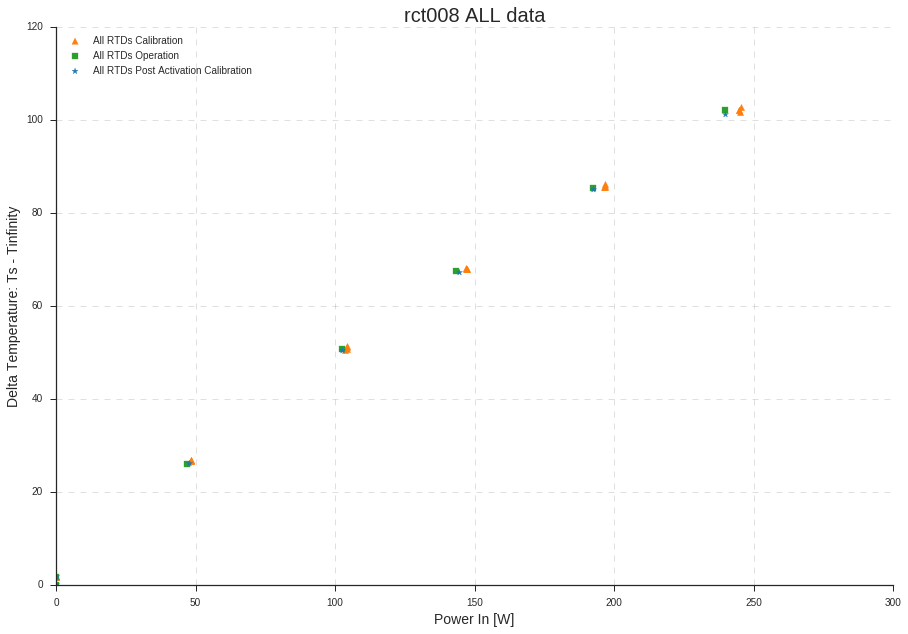

In [6]:
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

#rct008 DATA
ax.scatter(rct008powerIn[0:28], rct008All[0:28], color =tableau20[2], s=40, marker="^", label="All RTDs Calibration")
ax.scatter(rct008powerIn[28:35], rct008All[28:35], color =tableau20[4], s=40, marker="s", label="All RTDs Operation")
ax.scatter(rct008powerIn[35:42], rct008All[35:42], color =tableau20[0], s=40, marker="*", label="All RTDs Post Activation Calibration")

#graph options
plt.legend(loc='upper left')
plt.title('rct008 ALL data', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

# CALIBRATION RUNS

## input power vs average reactor
Average reactor temperature is the average of all RTDs 1-10 

In [7]:
# Calibration ALL
eventTuple = eventsDf.index[0:28]

# Ambient is the average of the two ambient rtds
# Cold is the average of the four outter rtds minus Ambient, then the mean is taken
# Warm is the average of the four middle rtds minus Ambient, then the mean is taken
# ColdWarm is the average of the eight non-center rtds minus Ambient, then the mean is taken
# Hot is the average of the two center rtds minus Ambient, then the mean is taken
# All is the average of the ten rtds minus Ambient, then the mean is taken
rct008powerIn = ([])
rct008Amb = ([])
rct008Cold = ([])
rct008Warm = ([])
rct008ColdWarm = ([])
rct008Hot = ([])
rct008All = ([])

for eventTup in eventTuple:
    rct008powerIn.append(findInputPower(eventTup))
    rct008Amb.append(np.mean(Temperatures(eventTup)[0]))
    rct008Cold.append(np.mean(Temperatures(eventTup)[1]))
    rct008Warm.append(np.mean(Temperatures(eventTup)[2]))
    rct008ColdWarm.append(np.mean(Temperatures(eventTup)[3]))
    rct008Hot.append(np.mean(Temperatures(eventTup)[4]))
    rct008All.append(np.mean(Temperatures(eventTup)[5]))

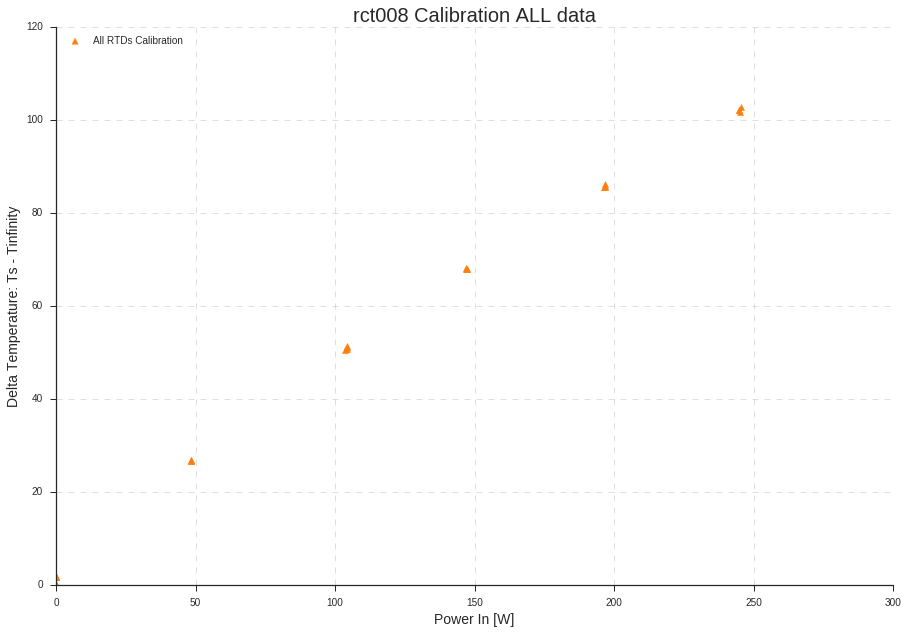

In [8]:
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

#rct008 Calibration DATA
ax.scatter(rct008powerIn, rct008All, color =tableau20[2], s=40, marker="^", label="All RTDs Calibration")

#graph options
plt.legend(loc='upper left')
plt.title('rct008 Calibration ALL data', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

## input power vs RTD temps
Average for "cold rtds" (1, 2, 9, 10), "warm rtds" (3, 4, 7, 8) and "hot rtds" (5, 6)

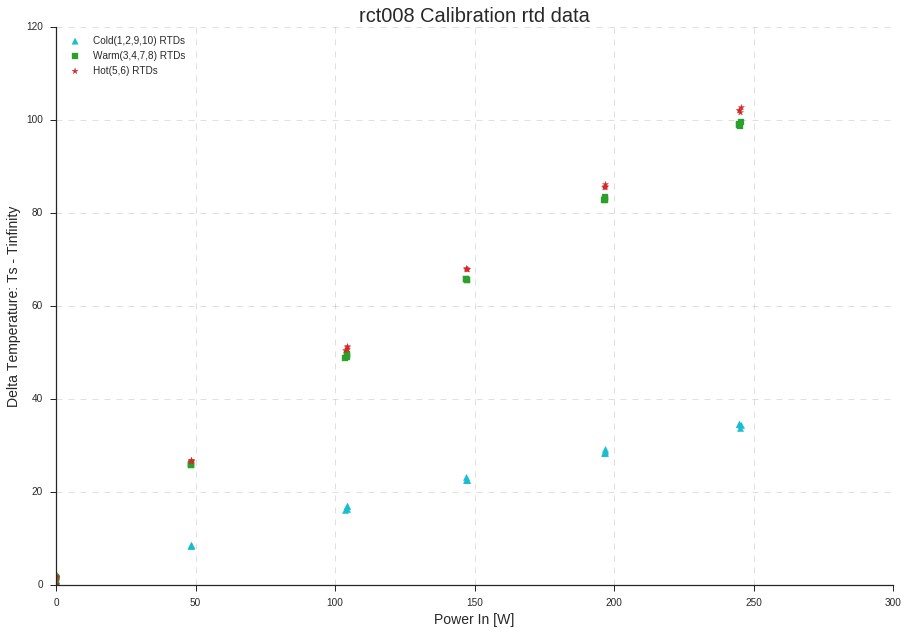

In [9]:
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

#rct008 Calibration DATA
ax.scatter(rct008powerIn[0:28], rct008Cold[0:28], color =tableau20[18], s=40, marker="^", label="Cold(1,2,9,10) RTDs")
ax.scatter(rct008powerIn[0:28], rct008Warm[0:28], color =tableau20[4], s=40, marker="s", label="Warm(3,4,7,8) RTDs")
ax.scatter(rct008powerIn[0:28], rct008All[0:28], color =tableau20[6], s=40, marker="*", label="Hot(5,6) RTDs")

#graph options
plt.legend(loc='upper left')
plt.title('rct008 Calibration rtd data', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

## RTD change - chart form
How much is each individual RTD changing for each equilibrium event?  

In [10]:
# CALIBRATION DATA, getting the lists
eventTuple = eventsDf.index[0:28]
amb1 = ([])
amb2 = ([])
rtd1 = ([])
rtd2 = ([])
rtd3 = ([])
rtd4 = ([])
rtd5 = ([])
rtd6 = ([])
rtd7 = ([])
rtd8 = ([])
rtd9 = ([])
rtd10 = ([])

for eventTup in eventTuple:
    amb1.append((Temperatures(eventTup)[6]))
    amb2.append((Temperatures(eventTup)[7]))
    rtd1.append((Temperatures(eventTup)[8]))
    rtd2.append((Temperatures(eventTup)[9]))
    rtd3.append((Temperatures(eventTup)[10]))
    rtd4.append((Temperatures(eventTup)[11]))
    rtd5.append((Temperatures(eventTup)[12]))
    rtd6.append((Temperatures(eventTup)[13]))
    rtd7.append((Temperatures(eventTup)[14]))
    rtd8.append((Temperatures(eventTup)[15]))
    rtd9.append((Temperatures(eventTup)[16]))
    rtd10.append((Temperatures(eventTup)[17]))

In [11]:
# splitting the data for each RTD
# for each equilibrium event, how much is the RTD changing? 
index = ['0','50','100','150','200','250','0']

# getting std and max-min
std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd1[x])
    rtdmaxmin = np.mean(max(rtd1[x])-min(rtd1[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd1Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd2[x])
    rtdmaxmin = np.mean(max(rtd2[x])-min(rtd2[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd2Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd3[x])
    rtdmaxmin = np.mean(max(rtd3[x])-min(rtd3[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd3Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd4[x])
    rtdmaxmin = np.mean(max(rtd4[x])-min(rtd4[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd4Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd5[x])
    rtdmaxmin = np.mean(max(rtd5[x])-min(rtd5[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd5Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd6[x])
    rtdmaxmin = np.mean(max(rtd6[x])-min(rtd6[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd6Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd7[x])
    rtdmaxmin = np.mean(max(rtd7[x])-min(rtd7[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd7Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd8[x])
    rtdmaxmin = np.mean(max(rtd8[x])-min(rtd8[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd8Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd9[x])
    rtdmaxmin = np.mean(max(rtd9[x])-min(rtd9[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd9Df = split

std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rtd10[x])
    rtdmaxmin = np.mean(max(rtd10[x])-min(rtd10[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rtd10Df = split

# printing all the results - can comment out to look at certain rtds - they are in dataframe format
print 'RTD 1'
print rtd1Df
print ' '
print 'RTD 2'
print rtd2Df
print ' '
print 'RTD 3'
print rtd3Df
print ' '
print 'RTD 4'
print rtd4Df
print ' '
print 'RTD 5'
print rtd5Df
print ' '
print 'RTD 6'
print rtd6Df
print ' '
print 'RTD 7'
print rtd7Df
print ' '
print 'RTD 8'
print rtd8Df
print ' '
print 'RTD 9'
print rtd9Df
print ' '
print 'RTD 10'
print rtd10Df

RTD 1
  Power [W]   He1 std He1 maxmin   He10 std He10 maxmin     H1 std H1 maxmin  \
0  0         0.176351  0.8455     0.0694069  0.3845      0.0776543  0.461      
1  50        0.211155  0.7995     0.218106   0.9695      0.225698   1.031      
2  100       0.314286  1.2395     0.21681    0.878       0.290685   1.072      
3  150       0.245881  0.8645     0.26466    1.0485      0.218791   1.049      
4  200       0.246325  0.9045     0.206012   0.887       0.237216   1.058      
5  250       0.243831  0.897      0.264393   1.2375      0.294326   1.19       
6  0         0.229086  0.915      0.23978    0.9985      0.249623   0.8915     

    H10 std H10 maxmin  
0  0.068407  0.384      
1  0.248974  1.0295     
2  0.228909  0.9025     
3  0.191365  0.9465     
4  0.221909  0.9175     
5  0.328789  1.4595     
6  0.252816  1.0455     
 
RTD 2
  Power [W]   He1 std He1 maxmin   He10 std He10 maxmin     H1 std H1 maxmin  \
0  0         0.172534  0.799      0.0690372  0.392       0.077153

## Reactor Temp change - Chart Form
How much is the average reactor temp changing for each equilibrium event?

In [12]:
index = ['0','50','100','150','200','250','0']
eventTuple = eventsDf.index[0:28]
rct008Temp = []
for eventTup in eventTuple:
    rct008Temp.append(Temperatures(eventTup)[5])

# # Same procedure as cell above
std = []
maxmin = []
for x in range(0,28):
    rtdstd = np.std(rct008Temp[x])
    rtdmaxmin = np.mean(max(rct008Temp[x])-min(rct008Temp[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
# split the list into the separate Gas and Pressure (H1, H10, He1, He10)
std = [std[x:x+7] for x in range (0, len(std), 7)]
maxmin = [maxmin[x:x+7] for x in range (0, len(maxmin), 7)]    
# Putting it into a dataframe and transposing to look nicer
split = pd.DataFrame([index, std[0], maxmin[0], std[1], maxmin[1], std[2], maxmin[2], std[3], maxmin[3]])
split = split.T
split.columns = ['Power [W]', 'He1 std', 'He1 maxmin', 'He10 std', 'He10 maxmin', 
                 'H1 std', 'H1 maxmin', 'H10 std', 'H10 maxmin']
rct008TempDf = split
rct008TempDf

,Power [W],He1 std,He1 maxmin,He10 std,He10 maxmin,H1 std,H1 maxmin,H10 std,H10 maxmin
0,0,0.152733,0.6609,0.0597254,0.2953,0.0667833,0.3827,0.0582514,0.3164
1,50,0.15939,0.6234,0.152044,0.665,0.174017,0.8768,0.216764,0.8799
2,100,0.264178,1.0414,0.177386,0.7501,0.230408,0.8983,0.16753,0.6773
3,150,0.206485,0.7908,0.175378,0.7372,0.206415,0.943,0.152956,0.7783
4,200,0.305189,1.0722,0.178212,0.9682,0.191503,0.8028,0.188039,0.7722
5,250,0.18833,0.8407,0.209985,0.9423,0.23307,0.9714,0.269745,1.2141
6,0,0.183475,0.7133,0.201045,0.7754,0.205625,0.7263,0.212642,0.8415


## Reactor Temp Change - Chart Form
-- What is the difference in reactor average temperatures, "cold rtds", "warm rtds", and "hot rtds" for each equilibrium event between:<br>
*1 Torr Helium and 1 Torr Hydrogen <br>
*10 Torr Helium and 10 Torr Hydrogen <br>
*1 Torr Helium and 10 Torr Helium <br>
*1 Torr Hydrogen and 10 Torr Hydrogen 

In [13]:
# The Data required
index = ['0','50','100','150','200','250','0']
# Helium 1 Torr
eventTuple = eventsDf.index[0:7]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures(eventTup)[4]))
He1RTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
He1RTC = He1RTC.T
He1RTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

# Helium 10 Torr
eventTuple = eventsDf.index[7:14]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures(eventTup)[4]))
He10RTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
He10RTC = He10RTC.T
He10RTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

# Hydrogen 1 Torr
eventTuple = eventsDf.index[14:21]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures(eventTup)[4]))
H1RTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
H1RTC = H1RTC.T
H1RTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

# Hydrogen 10 Torr
eventTuple = eventsDf.index[21:28]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures(eventTup)[4]))
H10RTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
H10RTC = H10RTC.T
H10RTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

In [14]:
# *1 Torr Helium - 1 Torr Hydrogen
rctTempDiff = (He1RTC.iloc[:,1]-H1RTC.iloc[:,1]).tolist()
coldTempDiff = (He1RTC.iloc[:,2]-H1RTC.iloc[:,2]).tolist()
warmTempDiff = (He1RTC.iloc[:,3]-H1RTC.iloc[:,3]).tolist()
hotTempDiff = (He1RTC.iloc[:,4]-H1RTC.iloc[:,4]).tolist()
He1H1 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
He1H1 = He1H1.T
He1H1.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# *10 Torr Helium - 10 Torr Hydrogen
rctTempDiff = (He10RTC.iloc[:,1]-H10RTC.iloc[:,1]).tolist()
coldTempDiff = (He10RTC.iloc[:,2]-H10RTC.iloc[:,2]).tolist()
warmTempDiff = (He10RTC.iloc[:,3]-H10RTC.iloc[:,3]).tolist()
hotTempDiff = (He10RTC.iloc[:,4]-H10RTC.iloc[:,4]).tolist()
He10H10 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
He10H10 = He10H10.T
He10H10.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# *1 Torr Helium - 10 Torr Helium
rctTempDiff = (He1RTC.iloc[:,1]-He10RTC.iloc[:,1]).tolist()
coldTempDiff = (He1RTC.iloc[:,2]-He10RTC.iloc[:,2]).tolist()
warmTempDiff = (He1RTC.iloc[:,3]-He10RTC.iloc[:,3]).tolist()
hotTempDiff = (He1RTC.iloc[:,4]-He10RTC.iloc[:,4]).tolist()
He1He10 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
He1He10 = He1He10.T
He1He10.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# *1 Torr Hydrogen - 10 Torr Hydrogen
rctTempDiff = (H1RTC.iloc[:,1]-H10RTC.iloc[:,1]).tolist()
coldTempDiff = (H1RTC.iloc[:,2]-H10RTC.iloc[:,2]).tolist()
warmTempDiff = (H1RTC.iloc[:,3]-H10RTC.iloc[:,3]).tolist()
hotTempDiff = (H1RTC.iloc[:,4]-H10RTC.iloc[:,4]).tolist()
H1H10 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
H1H10 = H1H10.T
H1H10.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

print '1 Torr He - 1 Torr H'
print He1H1
print ' '
print '10 Torr He - 10 Torr H'
print He10H10
print ' '
print '1 Torr He - 10 Torr He'
print He1He10
print ' '
print '1 Torr H - 10 Torr H'
print H1H10

1 Torr He - 1 Torr H
  Power [W]   dReactor      dCold      dWarm       dHot
0  0         1.53989    2.04809    1.45078    0.701705 
1  50        0.241632   0.18203    0.264709   0.314683 
2  100      -0.220853  -0.184096  -0.177849  -0.380373 
3  150       0.135853  -0.0987065  0.229738   0.417204 
4  200      -0.0479707  0.0884964 -0.0314895 -0.353867 
5  250       0.987939   0.760916   0.774984   1.86789  
6  0         0.0418804  0.0484367  0.0450769  0.0223744
 
10 Torr He - 10 Torr H
  Power [W]    dReactor      dCold      dWarm       dHot
0  0         0.1053      0.138115   0.104082   0.0421067
1  50        0.0391897  -0.127216   0.0284855  0.39341  
2  100       0.329195    0.073656   0.23587    1.02692  
3  150      -0.215641   -0.744585  -0.248778   0.908522 
4  200      -0.279957   -0.433347  -0.386966   0.240841 
5  250       0.00509606 -0.0517794 -0.1098     0.348639 
6  0        -0.217591   -0.268711  -0.204895  -0.140741 
 
1 Torr He - 10 Torr He
  Power [W]   dReactor   

# Operation and Post Activation Calibration (Run 003)
For Operation: <br>
-- Create the input power vs average reactor temperature graph.  Calculate average temperature 2 different ways: <br>
          (1) RTDs 1-10 <br>
          (2) RTD5, RTD7-10, RTD1Copy, RTD2 Copy, RTD3Copy, RTD4Copy, RTD5Copy <br>

In [15]:
# Operation Data onwards
eventTuple = eventsDf.index[28:42]

# Ambient2 is the average of the two ambient rtds
# Cold2 is the average of the four outter rtds minus Ambient, then the mean is taken
# Warm2 is the average of the four middle rtds minus Ambient, then the mean is taken
# ColdWarm2 is the average of the eight non-center rtds minus Ambient, then the mean is taken
# Hot2 is the average of the two center rtds minus Ambient, then the mean is taken
# All2 is the average of the ten rtds minus Ambient, then the mean is taken
# rctTemp2 is the substitute of rctAll2
# rct008ColdCopy is the substitute of Cold2
# rct008WarmCopy is the substitute of Warm2
# rct008HotCopy is the substitute of Hot2
rct008powerIn2 = ([])
rct008Amb2 = ([])
rct008Cold2 = ([])
rct008Warm2 = ([])
rct008ColdWarm2 = ([])
rct008Hot2 = ([])
rct008All2 = ([]) 
rctTemp2 = [] #uses copy data
rct008ColdCopy = [] #uses copy data
rct008WarmCopy = [] #uses copy data
rct008HotCopy = [] #uses copy data

# Using the function Temperatures2
# 0-9: Ambient,Cold,Warm,ColdWarm,Hot,All,amb1,amb2,rtd1,rtd2
# 10-19: rtd3,rtd4,rtd5,rtd6,rtd7,rtd8,rtd9,rtd10,All2,ColdCopy
# 20-26: WarmCopy,HotCopy,rtd1Copy,rtd2Copy,rtd3Copy,rtd4Copy,rtd5Copy
for eventTup in eventTuple:
    rct008powerIn2.append(findInputPower(eventTup))
    rct008Amb2.append(np.mean(Temperatures2(eventTup)[0]))
    rct008Cold2.append(np.mean(Temperatures2(eventTup)[1]))
    rct008Warm2.append(np.mean(Temperatures2(eventTup)[2]))
    rct008ColdWarm2.append(np.mean(Temperatures2(eventTup)[3]))
    rct008Hot2.append(np.mean(Temperatures2(eventTup)[4]))
    rct008All2.append(np.mean(Temperatures2(eventTup)[5]))
    rctTemp2.append(np.mean(Temperatures2(eventTup)[18]))
    rct008ColdCopy.append(np.mean(Temperatures2(eventTup)[19]))
    rct008WarmCopy.append(np.mean(Temperatures2(eventTup)[20]))
    rct008HotCopy.append(np.mean(Temperatures2(eventTup)[21]))

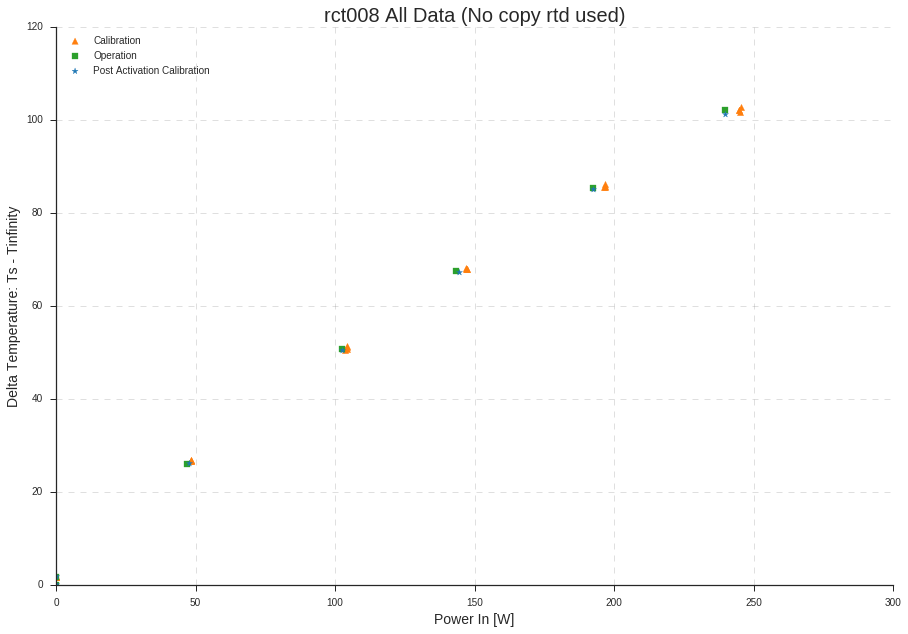

In [16]:
# RTDs 1 - 10
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

#rct008 Calibration DATA
ax.scatter(rct008powerIn[0:28], rct008All[0:28], color =tableau20[2], s=40, marker="^", label="Calibration")
ax.scatter(rct008powerIn2[0:7], rct008All2[0:7], color =tableau20[4], s=40, marker="s", label="Operation")
ax.scatter(rct008powerIn2[7:14], rct008All2[7:14], color =tableau20[0], s=40, marker="*", label="Post Activation Calibration")

#graph options
plt.legend(loc='upper left')
plt.title('rct008 All Data (No copy rtd used)', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

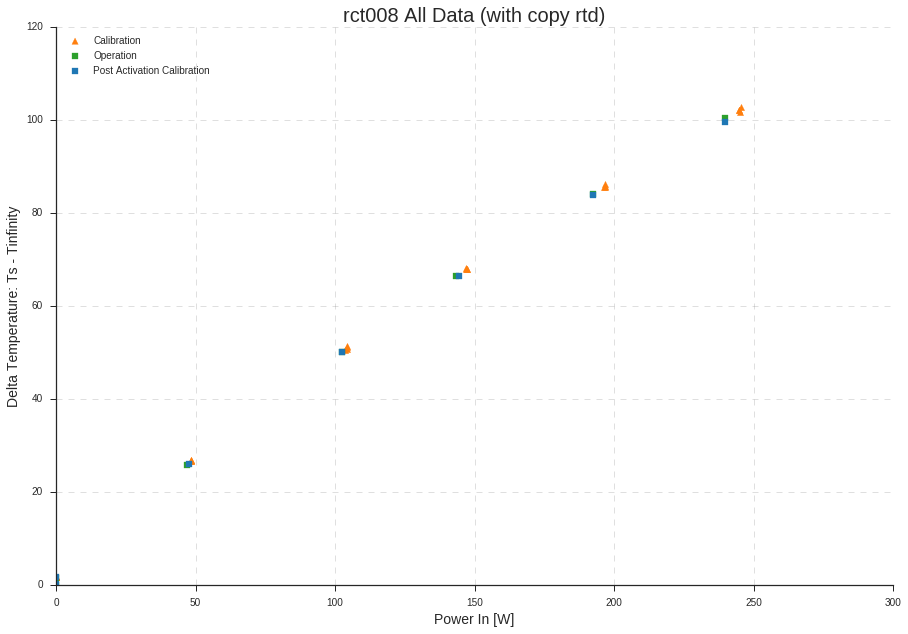

In [17]:
# RTDs with Copy Data
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

#rct008 Calibration DATA
ax.scatter(rct008powerIn[0:28], rct008All[0:28], color =tableau20[2], s=40, marker="^", label="Calibration")
ax.scatter(rct008powerIn2[0:7], rctTemp2[0:7], color =tableau20[4], s=40, marker="s", label="Operation")
ax.scatter(rct008powerIn2[7:14], rctTemp2[7:14], color =tableau20[0], s=40, marker="s", label="Post Activation Calibration")
#Note the comparison of calibration and operation uses different rtds 

#graph options
plt.legend(loc='upper left')
plt.title('rct008 All Data (with copy rtd)', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

Operation-- Create input power vs RTD temps .  Group the RTDs together so that you have an average for <br>
            (1) "cold rtds" (1, 2, 9, 10), "warm rtds" (3, 4, 7, 8) and "hot rtds" (5, 6)
            (2) "cold rtds" (1copy, 2copy, 9, 10), "warm rtds" (3copy, 4copy, 7, 8) and "hot rtds" (5, 5copy) 

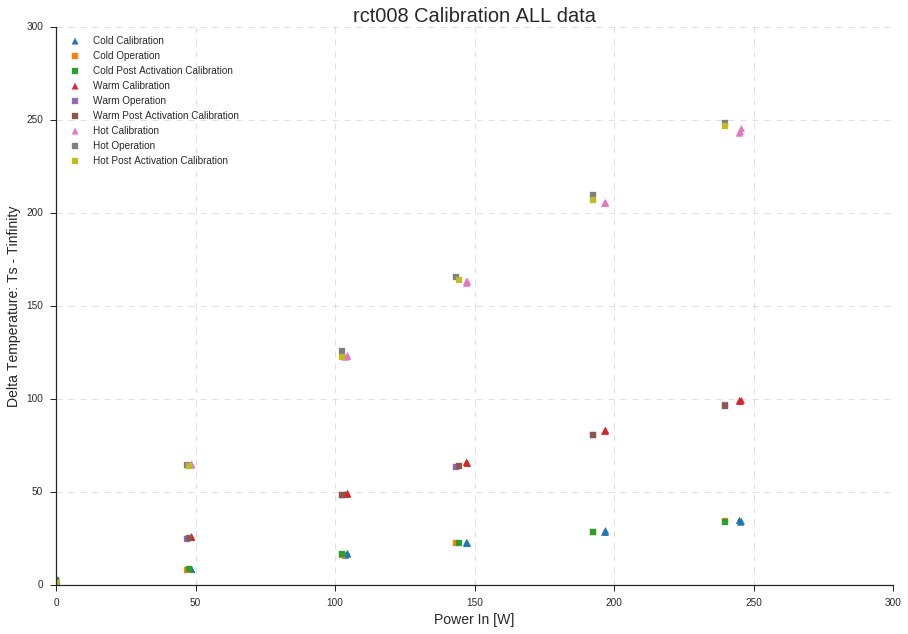

In [18]:
# RTDs 1 - 10  
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15, 10))

# to switch to copy data, replace the following:
# rct008Cold2 with rct008ColdCopy 
# rct008Warm2 with rct008WarmCopy
# rct008Hot2 with rct008HotCopy

#rct008 Cold DATA
ax.scatter(rct008powerIn[0:28], rct008Cold[0:28], color =tableau20[0], s=40, marker="^", label="Cold Calibration")
ax.scatter(rct008powerIn2[0:7], rct008Cold2[0:7], color =tableau20[2], s=40, marker="s", label="Cold Operation")
ax.scatter(rct008powerIn2[7:14], rct008Cold2[7:14], color =tableau20[4], s=40, marker="s", label="Cold Post Activation Calibration")

#rct008 Warm DATA
ax.scatter(rct008powerIn[0:28], rct008Warm[0:28], color =tableau20[6], s=40, marker="^", label="Warm Calibration")
ax.scatter(rct008powerIn2[0:7], rct008Warm2[0:7], color =tableau20[8], s=40, marker="s", label="Warm Operation")
ax.scatter(rct008powerIn2[7:14], rct008Warm2[7:14], color =tableau20[10], s=40, marker="s", label="Warm Post Activation Calibration")

#rct008 Hot DATA
ax.scatter(rct008powerIn[0:28], rct008Hot[0:28], color =tableau20[12], s=40, marker="^", label="Hot Calibration")
ax.scatter(rct008powerIn2[0:7], rct008Hot2[0:7], color =tableau20[14], s=40, marker="s", label="Hot Operation")
ax.scatter(rct008powerIn2[7:14], rct008Hot2[7:14], color =tableau20[16], s=40, marker="s", label="Hot Post Activation Calibration")

#graph options
plt.legend(loc='upper left')
plt.title('rct008 Calibration ALL data', fontsize = 20)
plt.xlabel('Power In [W]', fontsize = 14)
plt.ylabel('Delta Temperature: Ts - Tinfinity', fontsize = 14)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=0.5)
sns.despine()

Operation & Post activation calibration-- How much is each individual RTD changing for each equilibrium event?  This can be a chart instead of a graph. 

In [19]:
# run 003, getting the lists - OPERATION
eventTuple = eventsDf.index[28:35]
amb1 = ([])
amb2 = ([])
rtd1 = ([])
rtd2 = ([])
rtd3 = ([])
rtd4 = ([])
rtd5 = ([])
rtd6 = ([])
rtd7 = ([])
rtd8 = ([])
rtd9 = ([])
rtd10 = ([])
rtd1Copy = ([])
rtd2Copy = ([])
rtd3Copy = ([])
rtd4Copy = ([])
rtd5Copy = ([])

for eventTup in eventTuple:
    amb1.append(Temperatures2(eventTup)[6])
    amb2.append(Temperatures2(eventTup)[7])
    rtd1.append(Temperatures2(eventTup)[8])
    rtd2.append(Temperatures2(eventTup)[9])
    rtd3.append(Temperatures2(eventTup)[10])
    rtd4.append(Temperatures2(eventTup)[11])
    rtd5.append(Temperatures2(eventTup)[12])
    rtd6.append(Temperatures2(eventTup)[13])
    rtd7.append(Temperatures2(eventTup)[14])
    rtd8.append(Temperatures2(eventTup)[15])
    rtd9.append(Temperatures2(eventTup)[16])
    rtd10.append(Temperatures2(eventTup)[17])
    rtd1Copy.append(Temperatures2(eventTup)[22])
    rtd2Copy.append(Temperatures2(eventTup)[23])
    rtd3Copy.append(Temperatures2(eventTup)[24])
    rtd4Copy.append(Temperatures2(eventTup)[25])
    rtd5Copy.append(Temperatures2(eventTup)[26])

In [20]:
index = ['0','50','100','150','200','250','0']
# for each equilibrium event, how much is the RTD changing? - operation

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd1[x])
    rtdmaxmin = np.mean(max(rtd1[x])-min(rtd1[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd1OperationStd = std
rtd1OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd2[x])
    rtdmaxmin = np.mean(max(rtd2[x])-min(rtd2[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd2OperationStd = std
rtd2OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd3[x])
    rtdmaxmin = np.mean(max(rtd3[x])-min(rtd3[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd3OperationStd = std
rtd3OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd4[x])
    rtdmaxmin = np.mean(max(rtd4[x])-min(rtd4[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd4OperationStd = std
rtd4OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd5[x])
    rtdmaxmin = np.mean(max(rtd5[x])-min(rtd5[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd5OperationStd = std
rtd5OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd6[x])
    rtdmaxmin = np.mean(max(rtd6[x])-min(rtd6[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd6OperationStd = std
rtd6OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd7[x])
    rtdmaxmin = np.mean(max(rtd7[x])-min(rtd7[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd7OperationStd = std
rtd7OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd8[x])
    rtdmaxmin = np.mean(max(rtd8[x])-min(rtd8[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd8OperationStd = std
rtd8OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd9[x])
    rtdmaxmin = np.mean(max(rtd9[x])-min(rtd9[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd9OperationStd = std
rtd9OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd10[x])
    rtdmaxmin = np.mean(max(rtd10[x])-min(rtd10[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd10OperationStd = std
rtd10OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd1Copy[x])
    rtdmaxmin = np.mean(max(rtd1Copy[x])-min(rtd1Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd1CopyOperationStd = std
rtd1CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd2Copy[x])
    rtdmaxmin = np.mean(max(rtd2Copy[x])-min(rtd2Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd2CopyOperationStd = std
rtd2CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd3Copy[x])
    rtdmaxmin = np.mean(max(rtd3Copy[x])-min(rtd3Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd3CopyOperationStd = std
rtd3CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd4Copy[x])
    rtdmaxmin = np.mean(max(rtd4Copy[x])-min(rtd4Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd4CopyOperationStd = std
rtd4CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd5Copy[x])
    rtdmaxmin = np.mean(max(rtd5Copy[x])-min(rtd5Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd5CopyOperationStd = std
rtd5CopyOperationMaxmin = maxmin

# Putting it into a dataframe and transposing to look nicer
rtdColdDf = pd.DataFrame([index,rtd1OperationStd,rtd1OperationMaxmin, rtd2OperationStd, rtd2OperationMaxmin,
                          rtd9OperationStd, rtd9OperationMaxmin, rtd10OperationStd, rtd10OperationMaxmin, 
                          rtd1CopyOperationStd,rtd1CopyOperationMaxmin,rtd2CopyOperationStd,rtd2CopyOperationMaxmin])
rtdColdDf = rtdColdDf.T
rtdColdDf.columns = ['Power [W]','rtd1 std','rtd1 maxmin','rtd2 std','rtd2 maxmin','rtd9 std','rtd9 maxmin',
                     'rtd10 std','rtd10 maxmin','rtd1Copy std','rtd1Copy maxmin','rtd2Copy std', 'rtd2Copy maxmin']

rtdWarmDf = pd.DataFrame([index,rtd3OperationStd,rtd3OperationMaxmin,rtd4OperationStd,rtd4OperationMaxmin,
                          rtd7OperationStd, rtd7OperationMaxmin,rtd8OperationStd,rtd8OperationMaxmin,
                          rtd3CopyOperationStd,rtd3CopyOperationMaxmin,rtd4CopyOperationStd,rtd4CopyOperationMaxmin])
rtdWarmDf = rtdWarmDf.T
rtdWarmDf.columns = ['Power [W]','rtd3 std','rtd3 maxmin','rtd4 std','rtd4 maxin','rtd7 std','rtd7 maxmin',
                     'rtd8 std','rtd8 maxmin','rtd3Copy std','rtd3Copy maxmin','rtd4Copy std', 'rtd4Copy maxmin']

rtdHotDf = pd.DataFrame([index,rtd5OperationStd, rtd5OperationMaxmin,rtd6OperationStd, rtd6OperationMaxmin,
                         rtd5CopyOperationStd, rtd5CopyOperationMaxmin])
rtdHotDf = rtdHotDf.T
rtdHotDf.columns = ['Power [W]','rtd5 std','rtd5 maxin','rtd6 std','rtd6 maxin','rtd5Copy std','rtd5Copy maxin']

print 'Cold RTDs'
print rtdColdDf
print ' '
print 'Warm RTDs'
print rtdWarmDf
print ' '
print 'Hot RTDs'
print rtdHotDf

Cold RTDs
  Power [W]  rtd1 std rtd1 maxmin  rtd2 std rtd2 maxmin   rtd9 std  \
0  0         0.134188  0.83        0.133318  0.791       0.0697755   
1  50        0.263373  1.1535      0.254826  1.1455      0.351234    
2  100       0.334401  1.448       0.322406  1.3785      0.432725    
3  150       0.236276  1.187       0.22447   1.11        0.338534    
4  200       0.304325  1.3665      0.292144  1.3115      0.370832    
5  250       0.260748  1.3335      0.256877  1.279       0.319054    
6  0         0.257897  1.143       0.252672  1.1045      0.322123    

  rtd9 maxmin  rtd10 std rtd10 maxmin rtd1Copy std rtd1Copy maxmin  \
0  0.8515      0.0669455  0.8825       0.135649     0.8755           
1  1.647       0.34322    1.44         0.252725     1.1535           
2  1.5745      0.417392   1.4435       0.315598     1.455            
3  1.84        0.344867   1.824        0.253527     1.3025           
4  1.858       0.361908   1.48         0.314643     1.5595           
5  1.5185

In [21]:
# run 003, getting the lists - POST ACTIVATION CALIBRATION
eventTuple = eventsDf.index[35:42]
amb1 = ([])
amb2 = ([])
rtd1 = ([])
rtd2 = ([])
rtd3 = ([])
rtd4 = ([])
rtd5 = ([])
rtd6 = ([])
rtd7 = ([])
rtd8 = ([])
rtd9 = ([])
rtd10 = ([])
rtd1Copy = ([])
rtd2Copy = ([])
rtd3Copy = ([])
rtd4Copy = ([])
rtd5Copy = ([])

for eventTup in eventTuple:
    amb1.append(Temperatures2(eventTup)[6])
    amb2.append(Temperatures2(eventTup)[7])
    rtd1.append(Temperatures2(eventTup)[8])
    rtd2.append(Temperatures2(eventTup)[9])
    rtd3.append(Temperatures2(eventTup)[10])
    rtd4.append(Temperatures2(eventTup)[11])
    rtd5.append(Temperatures2(eventTup)[12])
    rtd6.append(Temperatures2(eventTup)[13])
    rtd7.append(Temperatures2(eventTup)[14])
    rtd8.append(Temperatures2(eventTup)[15])
    rtd9.append(Temperatures2(eventTup)[16])
    rtd10.append(Temperatures2(eventTup)[17])
    rtd1Copy.append(Temperatures2(eventTup)[22])
    rtd2Copy.append(Temperatures2(eventTup)[23])
    rtd3Copy.append(Temperatures2(eventTup)[24])
    rtd4Copy.append(Temperatures2(eventTup)[25])
    rtd5Copy.append(Temperatures2(eventTup)[26])

In [22]:
index = ['0','50','100','150','200','250','0']
# for each equilibrium event, how much is the RTD changing? - post activation calibration

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd1[x])
    rtdmaxmin = np.mean(max(rtd1[x])-min(rtd1[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd1OperationStd = std
rtd1OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd2[x])
    rtdmaxmin = np.mean(max(rtd2[x])-min(rtd2[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd2OperationStd = std
rtd2OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd3[x])
    rtdmaxmin = np.mean(max(rtd3[x])-min(rtd3[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd3OperationStd = std
rtd3OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd4[x])
    rtdmaxmin = np.mean(max(rtd4[x])-min(rtd4[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd4OperationStd = std
rtd4OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd5[x])
    rtdmaxmin = np.mean(max(rtd5[x])-min(rtd5[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd5OperationStd = std
rtd5OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd6[x])
    rtdmaxmin = np.mean(max(rtd6[x])-min(rtd6[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd6OperationStd = std
rtd6OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd7[x])
    rtdmaxmin = np.mean(max(rtd7[x])-min(rtd7[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd7OperationStd = std
rtd7OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd8[x])
    rtdmaxmin = np.mean(max(rtd8[x])-min(rtd8[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd8OperationStd = std
rtd8OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd9[x])
    rtdmaxmin = np.mean(max(rtd9[x])-min(rtd9[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd9OperationStd = std
rtd9OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd10[x])
    rtdmaxmin = np.mean(max(rtd10[x])-min(rtd10[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd10OperationStd = std
rtd10OperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd1Copy[x])
    rtdmaxmin = np.mean(max(rtd1Copy[x])-min(rtd1Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd1CopyOperationStd = std
rtd1CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd2Copy[x])
    rtdmaxmin = np.mean(max(rtd2Copy[x])-min(rtd2Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd2CopyOperationStd = std
rtd2CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd3Copy[x])
    rtdmaxmin = np.mean(max(rtd3Copy[x])-min(rtd3Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd3CopyOperationStd = std
rtd3CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd4Copy[x])
    rtdmaxmin = np.mean(max(rtd4Copy[x])-min(rtd4Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd4CopyOperationStd = std
rtd4CopyOperationMaxmin = maxmin

std = []
maxmin = []
for x in range(0,7):
    rtdstd = np.std(rtd5Copy[x])
    rtdmaxmin = np.mean(max(rtd5Copy[x])-min(rtd5Copy[x]))
    std.append(rtdstd)
    maxmin.append(rtdmaxmin)
rtd5CopyOperationStd = std
rtd5CopyOperationMaxmin = maxmin

# Putting it into a dataframe and transposing to look nicer
rtdColdDf = pd.DataFrame([index,rtd1OperationStd,rtd1OperationMaxmin, rtd2OperationStd, rtd2OperationMaxmin,
                          rtd9OperationStd, rtd9OperationMaxmin, rtd10OperationStd, rtd10OperationMaxmin, 
                          rtd1CopyOperationStd,rtd1CopyOperationMaxmin,rtd2CopyOperationStd,rtd2CopyOperationMaxmin])
rtdColdDf = rtdColdDf.T
rtdColdDf.columns = ['Power [W]','rtd1 std','rtd1 maxmin','rtd2 std','rtd2 maxmin','rtd9 std','rtd9 maxmin',
                     'rtd10 std','rtd10 maxmin','rtd1Copy std','rtd1Copy maxmin','rtd2Copy std', 'rtd2Copy maxmin']

rtdWarmDf = pd.DataFrame([index,rtd3OperationStd,rtd3OperationMaxmin,rtd4OperationStd,rtd4OperationMaxmin,
                          rtd7OperationStd, rtd7OperationMaxmin,rtd8OperationStd,rtd8OperationMaxmin,
                          rtd3CopyOperationStd,rtd3CopyOperationMaxmin,rtd4CopyOperationStd,rtd4CopyOperationMaxmin])
rtdWarmDf = rtdWarmDf.T
rtdWarmDf.columns = ['Power [W]','rtd3 std','rtd3 maxmin','rtd4 std','rtd4 maxin','rtd7 std','rtd7 maxmin',
                     'rtd8 std','rtd8 maxmin','rtd3Copy std','rtd3Copy maxmin','rtd4Copy std', 'rtd4Copy maxmin']

rtdHotDf = pd.DataFrame([index,rtd5OperationStd, rtd5OperationMaxmin,rtd6OperationStd, rtd6OperationMaxmin,
                         rtd5CopyOperationStd, rtd5CopyOperationMaxmin])
rtdHotDf = rtdHotDf.T
rtdHotDf.columns = ['Power [W]','rtd5 std','rtd5 maxin','rtd6 std','rtd6 maxin','rtd5Copy std','rtd5Copy maxin']

print 'Cold RTDs'
print rtdColdDf
print ' '
print 'Warm RTDs'
print rtdWarmDf
print ' '
print 'Hot RTDs'
print rtdHotDf

Cold RTDs
  Power [W]  rtd1 std rtd1 maxmin  rtd2 std rtd2 maxmin   rtd9 std  \
0  0         0.113888  0.653       0.113049  0.6375      0.0630827   
1  50        0.304251  1.4985      0.298337  1.461       0.343845    
2  100       0.275198  1.154       0.268766  1.132       0.380389    
3  150       0.257324  1.07        0.249228  1.07        0.305737    
4  200       0.263037  1.203       0.256659  1.1265      0.336978    
5  250       0.352758  1.73        0.33721   1.6665      0.47246     
6  0         0.250147  0.9215      0.24344   0.93        0.333604    

  rtd9 maxmin  rtd10 std rtd10 maxmin rtd1Copy std rtd1Copy maxmin  \
0  0.66        0.0621773  0.646        0.122908     0.6755           
1  1.785       0.336902   1.707        0.297511     1.468            
2  1.615       0.373458   1.5755       0.277314     1.286            
3  1.293       0.297283   1.2075       0.259247     1.1715           
4  1.5245      0.326122   1.2715       0.256354     1.289            
5  2.054 

Operation-- How much is the average reactor temp changing for each equilibrium event?  This can be a chart instead of a graph.  Note that you'll have to do this once for each type of average reactor temp calculation

In [23]:
index = ['0','50','100','150','200','250','0']
eventTuple = eventsDf.index[28:35]
#All rtds used
rct008Temp1 = []
rct008Cold1 = []
rct008Warm1 = []
rct008Hot1 = []
rct008Temp2 = []
rct008Cold2 = []
rct008Warm2 = []
rct008Hot2 = []
for eventTup in eventTuple:
    rct008Temp1.append(Temperatures2(eventTup)[5])
    rct008Cold1.append(Temperatures2(eventTup)[1])
    rct008Warm1.append(Temperatures2(eventTup)[2])
    rct008Hot1.append(Temperatures2(eventTup)[4])
    rct008Temp2.append(Temperatures2(eventTup)[18])
    rct008Cold2.append(Temperatures2(eventTup)[19])
    rct008Warm2.append(Temperatures2(eventTup)[20])
    rct008Hot2.append(Temperatures2(eventTup)[21])
# Same procedure as cell above
std1 = []
stdCold1 = []
stdWarm1 = []
stdHot1 = []
maxmin1 = []
maxminCold1 = []
maxminWarm1 = []
maxminHot1 = []

std2 = []
stdCold2 = []
stdWarm2 = []
stdHot2 = []
maxmin2 = []
maxminCold2 = []
maxminWarm2 = []
maxminHot2 = []

for x in range(0,7):        
    std1.append(np.std(rct008Temp1[x]))
    stdCold1.append(np.std(rct008Cold1[x]))
    stdWarm1.append(np.std(rct008Warm1[x]))
    stdHot1.append(np.std(rct008Hot1[x]))
    
    maxmin1.append(np.mean(max(rct008Temp1[x])-min(rct008Temp1[x])))
    maxminCold1.append(np.mean(max(rct008Cold1[x])-min(rct008Cold1[x])))
    maxminWarm1.append(np.mean(max(rct008Warm1[x])-min(rct008Warm1[x])))
    maxminHot1.append(np.mean(max(rct008Hot1[x])-min(rct008Hot1[x])))
    
    std2.append(np.std(rct008Temp2[x]))
    stdCold2.append(np.std(rct008Cold2[x]))
    stdWarm2.append(np.std(rct008Warm2[x]))
    stdHot2.append(np.std(rct008Hot2[x]))
    
    maxmin2.append(np.mean(max(rct008Temp2[x])-min(rct008Temp2[x])))
    maxminCold2.append(np.mean(max(rct008Cold2[x])-min(rct008Cold2[x])))
    maxminWarm2.append(np.mean(max(rct008Warm2[x])-min(rct008Warm2[x])))
    maxminHot2.append(np.mean(max(rct008Hot2[x])-min(rct008Hot2[x])))
    
avgReactorTemp1 = pd.DataFrame([index, std1, maxmin1, stdCold1, maxminCold1, stdWarm1, maxminWarm1,stdHot1, maxminHot1])
avgReactorTemp1 = avgReactorTemp1.T
avgReactorTemp1.columns = ['Power [W]', 'All RTDs std', 'All RTDs maxmin', 'Cold RTDs std', 'Cold RTDs maxmin', 
                           'Warm RTDs std', ' Warm RTDs maxmin', 'Hot RTDs std', 'Hot RTDs maxmin']
avgReactorTemp2 = pd.DataFrame([index, std2, maxmin2, stdCold2, maxminCold2, stdWarm2, maxminWarm2,stdHot2, maxminHot2])
avgReactorTemp2 = avgReactorTemp2.T
avgReactorTemp2.columns = ['Power [W]', 'All RTDs std', 'All RTDs maxmin', 'Cold RTDs std', 'Cold RTDs maxmin', 
                           'Warm RTDs std', ' Warm RTDs maxmin', 'Hot RTDs std', 'Hot RTDs maxmin']
print 'Method 1'
print avgReactorTemp1
print ' '
print 'Method 2'
print avgReactorTemp2

Method 1
  Power [W] All RTDs std All RTDs maxmin Cold RTDs std Cold RTDs maxmin  \
0  0         0.0938526    0.6545          0.087417      0.62125           
1  50        0.212639     1.0006          0.297747      1.285             
2  100       0.222027     0.9706          0.373153      1.3905            
3  150       0.176544     1.045           0.277819      1.444             
4  200       0.222711     1.1688          0.325278      1.3985            
5  250       0.214115     1.0827          0.278639      1.31              
6  0         0.22444      0.9631          0.285425      1.179             

  Warm RTDs std  Warm RTDs maxmin Hot RTDs std Hot RTDs maxmin  
0  0.0871724     0.687             0.129401     0.768           
1  0.185683      0.9925            0.132055     0.6685          
2  0.184661      0.85125           0.180335     1.223           
3  0.169297      0.99225           0.200545     0.9595          
4  0.218921      1.28375           0.180951     1.0005          


Operation - Comparison of the operation run to each of the 4 calibration runs:

-- What is the average reactor temperature difference at each equilibrium event?  You only need to use the average reactor temp calculated by using RTDs 1-10.  We'll use the rtd copy values when we compare to the post-activation calibration.

In [24]:
# using method 1 for operation
eventTuple = eventsDf.index[28:35]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures2(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures2(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures2(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures2(eventTup)[4]))
D2RTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
D2RTC = D2RTC.T
D2RTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

# using method 2 (copy rtd values) to get average reactor temp
eventTuple = eventsDf.index[28:35]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures2(eventTup)[18]))
    coldRTDs.append(np.mean(Temperatures2(eventTup)[19]))
    warmRTDs.append(np.mean(Temperatures2(eventTup)[20]))
    hotRTDs.append(np.mean(Temperatures2(eventTup)[21]))
D2RTC2 = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
D2RTC2 = D2RTC2.T
D2RTC2.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

eventTuple = eventsDf.index[35:42]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures2(eventTup)[18]))
    coldRTDs.append(np.mean(Temperatures2(eventTup)[19]))
    warmRTDs.append(np.mean(Temperatures2(eventTup)[20]))
    hotRTDs.append(np.mean(Temperatures2(eventTup)[21]))
PostHeRTC2 = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
PostHeRTC2 = PostHeRTC2.T
PostHeRTC2.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

In [25]:
# D2RTC - He1RTC, He10RTC, H1RTC, H10RTC

# operation to He1
rctTempDiff = (D2RTC.iloc[:,1]-He1RTC.iloc[:,1]).tolist()
coldTempDiff = (D2RTC.iloc[:,2]-He1RTC.iloc[:,2]).tolist()
warmTempDiff = (D2RTC.iloc[:,3]-He1RTC.iloc[:,3]).tolist()
hotTempDiff = (D2RTC.iloc[:,4]-He1RTC.iloc[:,4]).tolist()
D2He1 = pd.DataFrame([index,rctTempDiff,coldTempDiff,warmTempDiff,hotTempDiff])
D2He1 = D2He1.T
D2He1.columns = ['Power [W]', 'dReactor','dCold','dWarm','dHot']

# operation to He10
rctTempDiff = (D2RTC.iloc[:,1]-He10RTC.iloc[:,1]).tolist()
coldTempDiff = (D2RTC.iloc[:,2]-He10RTC.iloc[:,2]).tolist()
warmTempDiff = (D2RTC.iloc[:,3]-He10RTC.iloc[:,3]).tolist()
hotTempDiff = (D2RTC.iloc[:,4]-He10RTC.iloc[:,4]).tolist()
D2He10 = pd.DataFrame([index,rctTempDiff,coldTempDiff,warmTempDiff,hotTempDiff])
D2He10 = D2He10.T
D2He10.columns = ['Power [W]', 'dReactor','dCold','dWarm','dHot']

# operation to H1
rctTempDiff = (D2RTC.iloc[:,1]-H1RTC.iloc[:,1]).tolist()
coldTempDiff = (D2RTC.iloc[:,2]-H1RTC.iloc[:,2]).tolist()
warmTempDiff = (D2RTC.iloc[:,3]-H1RTC.iloc[:,3]).tolist()
hotTempDiff = (D2RTC.iloc[:,4]-H1RTC.iloc[:,4]).tolist()
D2H1 = pd.DataFrame([index,rctTempDiff,coldTempDiff,warmTempDiff,hotTempDiff])
D2H1 = D2H1.T
D2H1.columns = ['Power [W]', 'dReactor','dCold','dWarm','dHot']

# operation to H10
rctTempDiff = (D2RTC.iloc[:,1]-H10RTC.iloc[:,1]).tolist()
coldTempDiff = (D2RTC.iloc[:,2]-H10RTC.iloc[:,2]).tolist()
warmTempDiff = (D2RTC.iloc[:,3]-H10RTC.iloc[:,3]).tolist()
hotTempDiff = (D2RTC.iloc[:,4]-H10RTC.iloc[:,4]).tolist()
D2H10 = pd.DataFrame([index,rctTempDiff,coldTempDiff,warmTempDiff,hotTempDiff])
D2H10 = D2H10.T
D2H10.columns = ['Power [W]', 'dReactor','dCold','dWarm','dHot']

# operation to post calibration
rctTempDiff = (D2RTC2.iloc[:,1]-PostHeRTC2.iloc[:,1]).tolist()
coldTempDiff = (D2RTC2.iloc[:,2]-PostHeRTC2.iloc[:,2]).tolist()
warmTempDiff = (D2RTC2.iloc[:,3]-PostHeRTC2.iloc[:,3]).tolist()
hotTempDiff = (D2RTC2.iloc[:,4]-PostHeRTC2.iloc[:,4]).tolist()
D2PostHe = pd.DataFrame([index,rctTempDiff,coldTempDiff,warmTempDiff,hotTempDiff])
D2PostHe = D2PostHe.T
D2PostHe.columns = ['Power [W]', 'dReactor','dCold','dWarm','dHot']

print 'Operation - 1 Torr He'
print D2He1
print ' '
print 'Operation - 10 Torr He'
print D2He10
print ' '
print 'Operation - 1 Torr H'
print D2H1
print ' '
print 'Operation - 10 Torr H'
print D2H10
print ' '
print 'Operation - 1.5 Torr He (Copy rtds)'
print D2PostHe

Operation - 1 Torr He
  Power [W]   dReactor       dCold      dWarm      dHot
0  0        -1.59834   -2.06751    -1.45945   -0.937778
1  50       -0.896347  -0.631369   -1.31583   -0.587328
2  100       0.331403   0.126102   -0.802324   3.00946 
3  150      -0.598098  -0.199907   -2.18768    1.78468 
4  200      -0.069791  -0.219341   -2.0044     4.09853 
5  250      -0.633116  -0.00838735 -2.80544    2.46207 
6  0        -0.0963718 -0.0847508  -0.0794799 -0.153398
 
Operation - 10 Torr He
  Power [W]   dReactor     dCold      dWarm      dHot
0  0        -0.120519  -0.103313 -0.069845  -0.25628 
1  50       -0.767472  -0.445797 -1.15896   -0.627845
2  100      -0.574136  -0.717005 -1.5557     1.67474 
3  150      -0.520228  -0.225484 -2.02312    1.89607 
4  200      -0.40582   -0.742127 -2.28202    4.0192  
5  250       0.0141896 -0.160432 -2.25006    4.89193 
6  0        -0.0615293 -0.038947 -0.0454507 -0.138851
 
Operation - 1 Torr H
  Power [W]   dReactor      dCold       dWarm     

Post Activation - Can you do the comparisons between the post activation operation and calibration runs?

In [26]:
index = ['0','50','100','150','200','250','0']
# Post Activation Operation
eventTuple = eventsDf.index[35:42]
allRTDs = []
coldRTDs = [] 
warmRTDs = [] 
hotRTDs = [] 
for eventTup in eventTuple:
    allRTDs.append(np.mean(Temperatures(eventTup)[5]))
    coldRTDs.append(np.mean(Temperatures(eventTup)[1]))
    warmRTDs.append(np.mean(Temperatures(eventTup)[2]))
    hotRTDs.append(np.mean(Temperatures(eventTup)[4]))
PostHeRTC = pd.DataFrame([index,allRTDs,coldRTDs,warmRTDs,hotRTDs])
PostHeRTC = PostHeRTC.T
PostHeRTC.columns = ['Power [W]','All', 'Cold', 'Warm', 'Hot']

# Calibration runs: He1RTC, He10RTC, H1RTC, H10RTC
# Post - He1RTC 
rctTempDiff = (PostHeRTC.iloc[:,1]-He1RTC.iloc[:,1]).tolist()
coldTempDiff = (PostHeRTC.iloc[:,2]-He1RTC.iloc[:,2]).tolist()
warmTempDiff = (PostHeRTC.iloc[:,3]-He1RTC.iloc[:,3]).tolist()
hotTempDiff = (PostHeRTC.iloc[:,4]-He1RTC.iloc[:,4]).tolist()
PostHeHe1 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
PostHeHe1 = PostHeHe1.T
PostHeHe1.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# Post - He10RTC
rctTempDiff = (PostHeRTC.iloc[:,1]-He10RTC.iloc[:,1]).tolist()
coldTempDiff = (PostHeRTC.iloc[:,2]-He10RTC.iloc[:,2]).tolist()
warmTempDiff = (PostHeRTC.iloc[:,3]-He10RTC.iloc[:,3]).tolist()
hotTempDiff = (PostHeRTC.iloc[:,4]-He10RTC.iloc[:,4]).tolist()
PostHeHe10 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
PostHeHe10 = PostHeHe10.T
PostHeHe10.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# Post - H1RTC 
rctTempDiff = (PostHeRTC.iloc[:,1]-H1RTC.iloc[:,1]).tolist()
coldTempDiff = (PostHeRTC.iloc[:,2]-H1RTC.iloc[:,2]).tolist()
warmTempDiff = (PostHeRTC.iloc[:,3]-H1RTC.iloc[:,3]).tolist()
hotTempDiff = (PostHeRTC.iloc[:,4]-H1RTC.iloc[:,4]).tolist()
PostHeH1 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
PostHeH1 = PostHeH1.T
PostHeH1.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

# Post - H10RTC
rctTempDiff = (PostHeRTC.iloc[:,1]-H10RTC.iloc[:,1]).tolist()
coldTempDiff = (PostHeRTC.iloc[:,2]-H10RTC.iloc[:,2]).tolist()
warmTempDiff = (PostHeRTC.iloc[:,3]-H10RTC.iloc[:,3]).tolist()
hotTempDiff = (PostHeRTC.iloc[:,4]-H10RTC.iloc[:,4]).tolist()
PostHeH10 = pd.DataFrame([index,rctTempDiff, coldTempDiff, warmTempDiff, hotTempDiff])
PostHeH10 = PostHeH10.T
PostHeH10.columns = ['Power [W]', 'dReactor', 'dCold', 'dWarm', 'dHot']

print 'Post - He 1 Torr'
print PostHeHe1
print ' '
print 'Post - He 10 Torr'
print PostHeHe10
print ' '
print 'Post - H 1 Torr'
print PostHeH1
print ' '
print 'Post - H 10 Torr'
print PostHeH10

Post - He 1 Torr
  Power [W]    dReactor      dCold     dWarm       dHot
0  0        -1.40834    -1.81693   -1.28752  -0.832801 
1  50       -0.723113   -0.36728   -0.822039 -1.23693  
2  100       0.00155336  0.505168  -0.611421  0.220272 
3  150      -0.687909   -0.0854663 -1.80439   0.340173 
4  200      -0.373074    0.0896009 -1.97874   1.91291  
5  250      -1.52997    -0.760985  -3.44352   0.759166 
6  0         0.151262    0.238731   0.149801 -0.0207539
 
Post - He 10 Torr
  Power [W]   dReactor     dCold     dWarm        dHot
0  0         0.0694793  0.147265  0.102085 -0.151303  
1  50       -0.594238  -0.181708 -0.665166 -1.27744   
2  100      -0.903986  -0.337939 -1.3648   -1.11445   
3  150      -0.610039  -0.111044 -1.63984   0.451565  
4  200      -0.709102  -0.433185 -2.25636   1.83358   
5  250      -0.882664  -0.913029 -2.88815   3.18903   
6  0         0.186105   0.284535  0.18383  -0.00620777
 
Post - H 1 Torr
  Power [W]  dReactor        dCold     dWarm        dHot


Post Activation - Compare input power to the avg rct temps?

In [27]:
index = ['0','50','100','150','200','250','0']
# Post Activation data
eventTuple = eventsDf.index[35:42]

# Separating rtd1-10 and copy rtds
rct008Temp1 = []
rct008Temp2 = []
for eventTup in eventTuple:
    rct008Temp1.append(np.mean(Temperatures2(eventTup)[5])) # rtds 1-10
    rct008Temp2.append(np.mean(Temperatures2(eventTup)[18])) # copy rtds

avgRctTemps = pd.DataFrame([index,rct008Temp1,rct008Temp2])
avgRctTemps = avgRctTemps.T
avgRctTemps.columns = ['Power [W]', 'Method 1', 'Method 2']
avgRctTemps

,Power [W],Method 1,Method 2
0,0,0.226823,0.18863
1,50,26.1383,26.0066
2,100,50.4765,49.9809
3,150,67.3025,66.4698
4,200,85.1021,83.8506
5,250,101.216,99.5198
6,0,1.82083,1.7538
